In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode, plot
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import plotly.express as px
import chart_studio

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
username = 'nageen20'
api_key = '36ThkyycWBMLfSEOpCCx'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [19]:
df = pd.read_csv('HISTORICAL_DATA\HISTORICAL_DATA\DRREDDY_data.csv')

In [21]:
df.head(5)

,Date,open,high,low,close,adj_close,volume
0,2000-01-03,376.25,377.062012,376.250000,377.062012,316.086029,53120.0
1,2000-01-04,397.50,407.237000,377.500000,407.237000,341.381348,228568.0
2,2000-01-05,387.25,412.500000,374.750000,392.013000,328.619263,478788.0
3,2000-01-06,399.75,423.375000,392.750000,415.388000,348.214203,487864.0
4,2000-01-07,421.25,421.250000,382.162994,382.274994,320.455994,318564.0


In [10]:
# Remove the null entries
df.dropna(inplace=True)

In [11]:
# Change the data type of date column
# Create columns for date, month, year and day from the date
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day_name()

In [12]:
# Get the difference between high and low
# Get the difference between Open and Close
# Get whether a gain day or a loss day

df['diff_HL'] = df['high'] - df['low']
df['diff_OC'] = df['open'] - df['close']
df['Daily_GL'] = df['diff_OC'].apply(lambda x: 'Gain' if x >= 0 else 'Loss')

In [13]:
df.head()

,Date,open,high,low,close,adj_close,volume,Month,Year,Day,diff_HL,diff_OC,Daily_GL
0,2000-01-03,376.25,377.062012,376.250000,377.062012,316.086029,53120.0,January,2000,Monday,0.812012,-0.812012,Loss
1,2000-01-04,397.50,407.237000,377.500000,407.237000,341.381348,228568.0,January,2000,Tuesday,29.737000,-9.737000,Loss
2,2000-01-05,387.25,412.500000,374.750000,392.013000,328.619263,478788.0,January,2000,Wednesday,37.750000,-4.763000,Loss
3,2000-01-06,399.75,423.375000,392.750000,415.388000,348.214203,487864.0,January,2000,Thursday,30.625000,-15.638000,Loss
4,2000-01-07,421.25,421.250000,382.162994,382.274994,320.455994,318564.0,January,2000,Friday,39.087006,38.975006,Gain


In [14]:
df.Daily_GL.value_counts()

Gain    2532
Loss    2259
Name: Daily_GL, dtype: int64

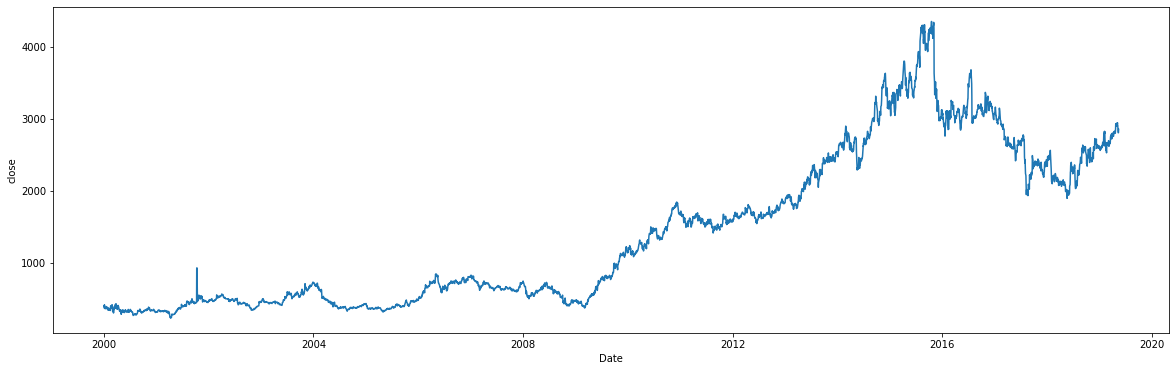

In [15]:
fig = plt.figure(figsize=(20,6))
sns.lineplot(x='Date',y='close',data=df)
plt.show()

In [16]:
trace_close = go.Scatter(
    x=df.Date,
    y=df['close'],
    name = "Dr Reddy lab Low",
    line = dict(color = '#7F7F7F'),
    opacity = 0.8)

data = [trace_close]

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(count=12,
                     label='1y',
                     step='month',
                     stepmode='backward'),
                dict(count=60,
                     label='5y',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")
py.plot(fig, filename='Plotly_Stock_DrReddy.html',auto_open=True)

'https://plot.ly/~nageen20/1/'

In [17]:
import chart_studio.tools as tls
tls.get_embed('https://plot.ly/~nageen20/1/#/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~nageen20/1.embed" height="525" width="100%"></iframe>'

In [44]:
trace_one = go.Box(y = df[df['diff_OC']>=0]['diff_OC'])
trace_two = go.Box(y = abs(df[df['diff_OC']<0]['diff_OC']))

data = [trace_one, trace_two]
fig = go.Figure(data)
fig.update_yaxes(range=[0, 100])
fig.show()

In [45]:
df[df['diff_OC']>=0]['diff_OC'].mean()

17.800263601105854

In [15]:
# Time series analysis

In [16]:
# IN time series analysis, the data has to be stationary
# Data is stationary when mean, variance and auo correlation of the variable doesn't change over time
# It is easy to predict when the data os stationary
# Use transformations to convert the data to stationary
# First test the data for stationarity usinf ADF (Augmented Dickey-FUllers test)

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import matplotlib.pyplot as plt

In [67]:
rolmean = df[['Date','close']]
rolmean['close'] = df['close'].rolling(300).mean()
rolstd = df[['Date','close']]
rolstd['close']= df['close'].rolling(300).std()

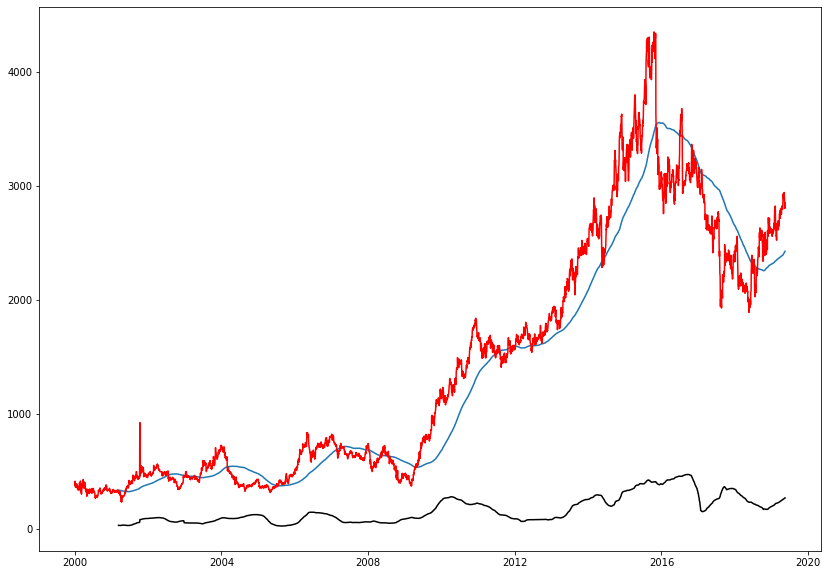

In [68]:
fig = plt.figure(figsize=(14,10))
plt.plot(rolmean.Date,rolmean.close)
plt.plot(df.Date,df.close,color='red')
plt.plot(rolstd.Date,rolstd.close,color='black')

In [69]:
# From the above plot we can see the mean is clearly changing over time.
# The standard deviation is varying slight but as much compared to the mean.
# So we can say that the above process is not stationary.
# Let us do the Dickey Fuller test to confirm the same

In [71]:
print('Results of dickey fuller test')
adft = adfuller(df['close'],autolag='AIC')
output = pd.Series(adft[0:4], index=['Test Statistic','p-value','No. of lags used','Number of observations used'])
for key,values in adft[4].items():
    output['critical values(%s)'%key] = values
print(output)

Results of dickey fuller test
Test Statistic                   -0.715175
p-value                           0.842780
No. of lags used                 17.000000
Number of observations used    4773.000000
critical values(1%)              -3.431721
critical values(5%)              -2.862146
critical values(10%)             -2.567092
dtype: float64


In [72]:
# The p-value is 0.84 which is higher than 0.05, so we cannot reject null hypothesis.
# Hence it is a non stationary process

In [73]:
# Let's split the series into trend, seasonality and residual

<Figure size 432x288 with 0 Axes>

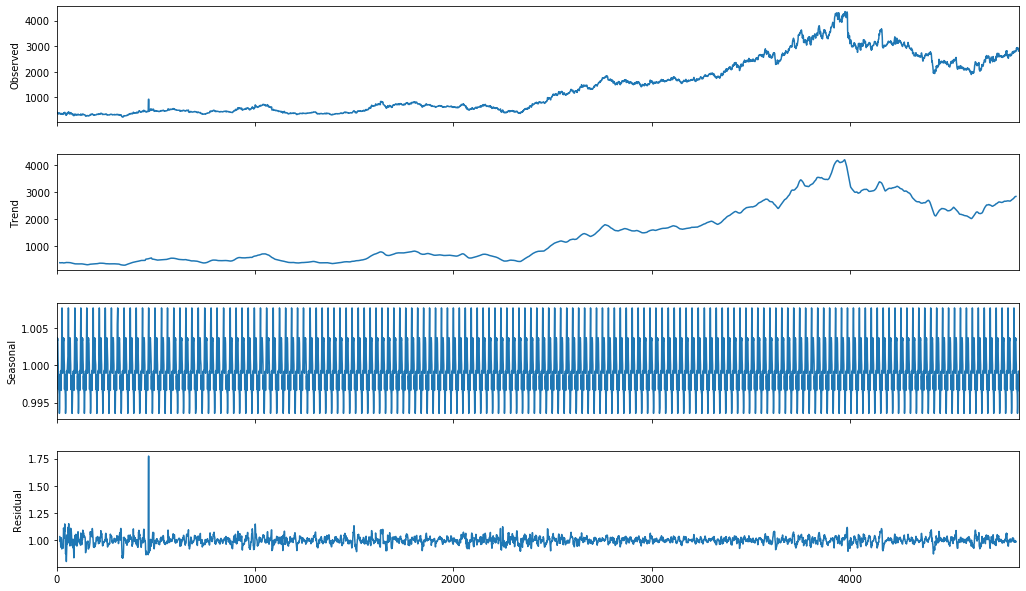

In [75]:
result = seasonal_decompose(df.close, model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

In [79]:
# Take the log of the data to reduce the increasing trend.
df_log = np.log(df.close)
plt.plot(df_log)

AttributeError: 'Timestamp' object has no attribute 'log'

In [77]:
# ARIMA model to train the model

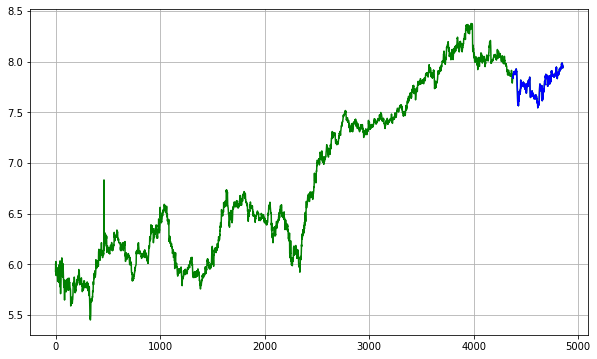

In [78]:
# Split the test train data
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(df_log, 'green')
plt.plot(test_data,'blue')

In [80]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                            test='adf',
                            max_p=3, max_q=3,
                            m=1,
                            d=None,
                            seasonal=False,
                            start_P=0,
                            D=0,
                            trace=True,
                            error_function='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(model_autoARIMA.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-19093.133, BIC=-19080.397, Fit time=0.531 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-19092.469, BIC=-19073.365, Fit time=0.367 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-19092.299, BIC=-19073.195, Fit time=0.318 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=-19094.045, BIC=-19087.677, Fit time=0.190 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=-19090.520, BIC=-19065.048, Fit time=0.866 seconds
Total fit time: 2.595 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 4308
Model:               SARIMAX(0, 1, 0)   Log Likelihood                9548.023
Date:                Fri, 24 Jan 2020   AIC                         -19094.045
Time:                        14:59:37   BIC                         -19087.677
Sample:             

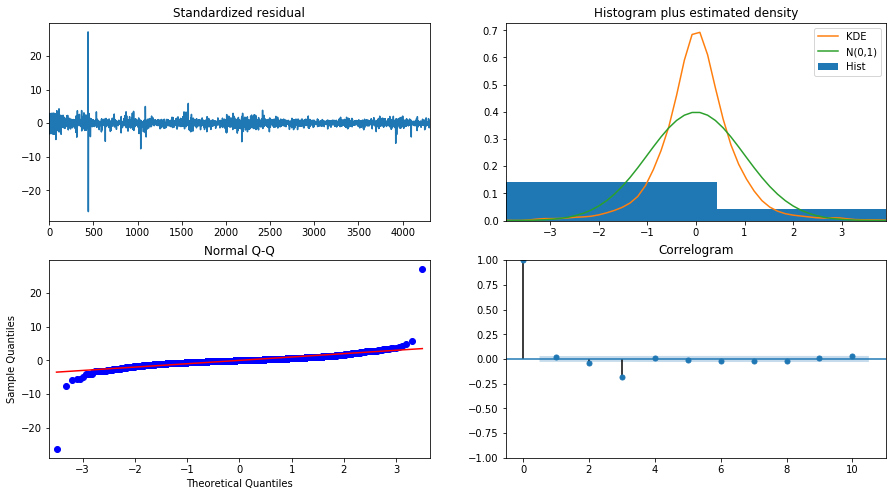

In [81]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [82]:
model = ARIMA(train_data, order=(1,1,1))
fitted = model.fit(disp=-1)
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                 4307
Model:                 ARIMA(1, 1, 1)   Log Likelihood                9549.391
Method:                       css-mle   S.D. of innovations              0.026
Date:                Fri, 24 Jan 2020   AIC                         -19090.781
Time:                        15:02:43   BIC                         -19065.309
Sample:                             1   HQIC                        -19081.786
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0004      0.000      1.024      0.306      -0.000       0.001
ar.L1.D.close    -0.0807      0.175     -0.461      0.645      -0.424       0.263
ma.L1.D.close     0.1002      0.174     

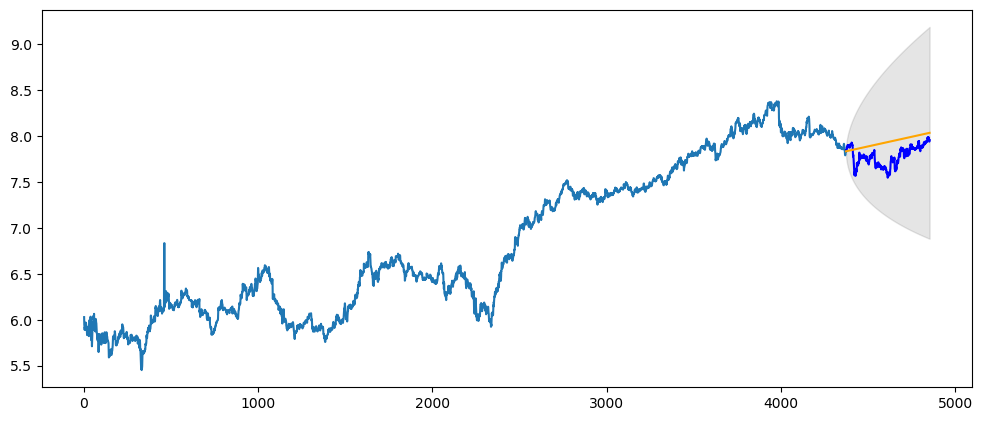

In [84]:
fc,se,conf = fitted.forecast(480, alpha=0.05)

fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:,0], index=test_data.index)
upper_series = pd.Series(conf[:,1],index=test_data.index)

plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label='training')
plt.plot(test_data,color='blue',label='Actual Stock Price')
plt.plot(fc_series,color='orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index,lower_series,upper_series, color='k',alpha=0.1)
plt.show()